# Visualizing streamlines

https://www.numbercrunch.de/blog/2013/05/visualizing-streamlines/

Streamlines are continuous lines whose tangent at each point is given by a vector field. Each line, and therefore also streamlines, can be parametrized by some parameter. A streamline $\mathbf{r}(t)$ fulfils the equation

$$
\frac{d\mathbf{r}(t)}{dt} = g(t) \mathbf{F}(\mathbf{r}(t))
$$

where $\mathbf{F}(\mathbf{r}(t))$ is the vector field and $g(t)$ some scaling function. The scaling functions is arbitrary but must not be zero. It basically determines how fast one moves along the streamline as a function of the parameter t. It is often convenient to set

$$
g(t) = \frac{1}{|\mathbf{F}(\mathbf{r}(t))|}
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class charge:
    def __init__(self, q, pos):
        self.q = q 
        self.pos = pos

def E_point_charge(q, a, x, y):
    den = np.hypot(x-a[0], y-a[1])**3
    Ex = q * (x - a[0]) / den
    Ey = q * (y - a[1]) / den
    return Ex, Ey

def E_total(x, y, charges):
    Ex, Ey = 0, 0
    for C in charges:
        ex, ey = E_point_charge(C.q, C.pos, x, y)
        Ex += ex
        Ey += ey
    return Ex, Ey

## Matplotlib's streamplot

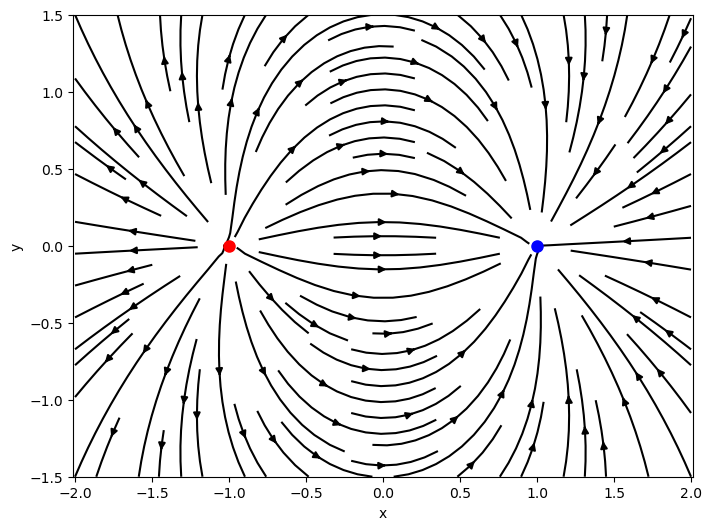

In [ ]:
# charges and positions
charges = [ charge(1, [-1, 0]), charge(-1, [1, 0]) ]

# grid
x0, x1 = -2, 2
y0, y1 = -1.5, 1.5
nx, ny = 64, 64
x = np.linspace(x0, x1, nx)
y = np.linspace(y0, y1, ny)
x, y = np.meshgrid(x, y)

# electric field
Ex, Ey = E_total(x, y, charges)

# plot field lines
plt.figure(figsize=(8, 6))
plt.streamplot(x, y, Ex, Ey, color='black')

# plot point charges
for C in charges:
    if C.q > 0:
        plt.plot(C.pos[0], C.pos[1], 'ro', ms=8*np.sqrt(C.q))
    if C.q < 0:
        plt.plot(C.pos[0], C.pos[1], 'bo', ms=8*np.sqrt(-C.q))

plt.xlabel('x')
plt.ylabel('y')
plt.xlim(x0, x1)
plt.ylim(y0, y1)
plt.axis('equal')
plt.show()

## Solving streamline ODE

In [ ]:
from scipy.integrate import ode

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.ode.html

Matplotlib’s streamplot function is very generic and easy to use. However it does not know anything about specific characteristics of the vector field to plot. For example, it is not able to take into account that streamlines of electric fields always start and end at the charges. Therefore, the following code plots streamlines by solving the streamlines’ ordinary differential equations. We always start close in the vicinity of the electric charges and extend each streamline until it has reached another charge or has left the plotting area.

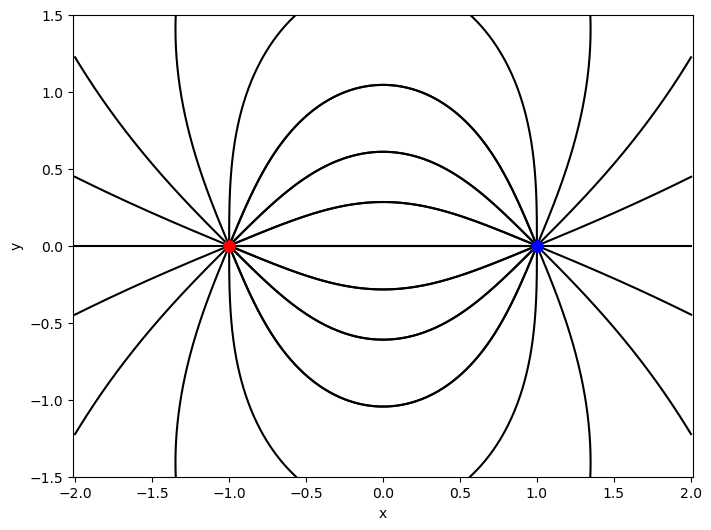

In [ ]:
# charges and positions
charges = [ charge(1, [-1, 0]), charge(-1, [1, 0]) ]

# grid
x0, x1 = -2, 2
y0, y1 = -1.5, 1.5

# margin
R = 0.01

# ODE function (right-hand side of the ODE system)
def streamline(t, y, charges):
    Ex, Ey = E_total(y[0], y[1], charges)
    Emag = np.hypot(Ex, Ey)
    return [Ex/Emag, Ey/Emag]

# number of field lines starting in each charge
N = 16

plt.figure(figsize=(8, 6))
# loop over all charges
for C in charges:
    # plot field lines starting in current charge
    dt = 0.8*R
    if C.q < 0:
        dt = -dt
    # loop over field lines starting in N different directions around current charge
    for alpha in np.linspace(0, 2*np.pi*(N-1)/N, N):
        r = ode(streamline)
        r.set_integrator('vode')
        r.set_f_params(charges)
        xp = [ C.pos[0] + R*np.cos(alpha) ]
        yp = [ C.pos[1] + R*np.sin(alpha) ]
        r.set_initial_value([xp[0], yp[0]], t=0.0)
        while r.successful():
            r.integrate(r.t + dt)
            xp.append(r.y[0])
            yp.append(r.y[1])
            hit_charge = False
            # check if field line left drawing area or ends in some charge
            for C2 in charges:
                distance = np.hypot(r.y[0]-C2.pos[0], r.y[1]-C2.pos[1])
                if distance < R:
                    hit_charge = True
            x_inside = x0 < r.y[0] and r.y[0] < x1
            y_inside = y0 < r.y[1] and r.y[1] < y1
            if hit_charge or (not x_inside) or (not y_inside):
                break
        plt.plot(xp, yp, '-k')

# plot point charges
for C in charges:
    if C.q > 0:
        plt.plot(C.pos[0], C.pos[1], 'ro', ms=8*np.sqrt(C.q))
    if C.q < 0:
        plt.plot(C.pos[0], C.pos[1], 'bo', ms=8*np.sqrt(-C.q))

plt.xlabel('x')
plt.ylabel('y')
plt.xlim(x0, x1)
plt.ylim(y0, y1)
plt.axis('equal')
plt.gca().set_xmargin(0)
plt.gca().set_ymargin(0)
plt.show()

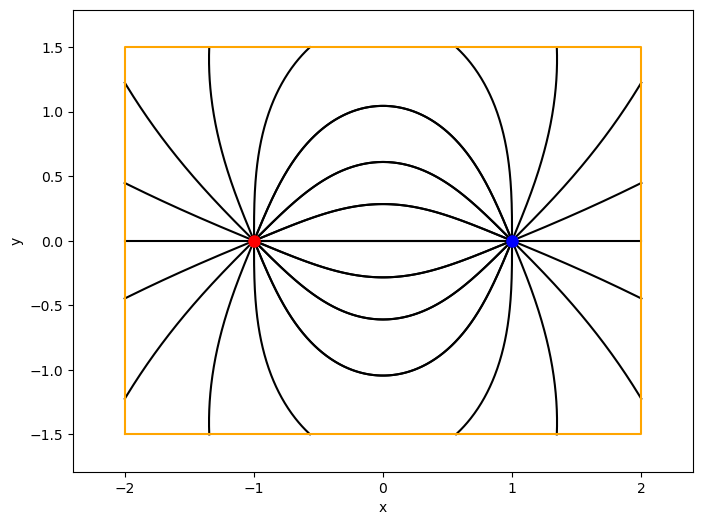

In [ ]:
# charges and positions
charges = [ charge(1, [-1, 0]), charge(-1, [1, 0]) ]

# grid
x0, x1 = -2, 2
y0, y1 = -1.5, 1.5

# margin
R = 0.01

# ODE function (right-hand side of the ODE system)
def streamline(t, y, charges):
    Ex, Ey = E_total(y[0], y[1], charges)
    Emag = np.hypot(Ex, Ey)
    return [Ex/Emag, Ey/Emag]

# number of field lines starting in each charge
N = 16

plt.figure(figsize=(8, 6))
# loop over all charges
for C in charges:
    # plot field lines starting in current charge
    dt = 0.8*R
    if C.q < 0:
        dt = -dt
    # loop over field lines starting in N different directions around current charge
    for alpha in np.linspace(0, 2*np.pi*(N-1)/N, N):
        r = ode(streamline)
        r.set_integrator('vode')
        r.set_f_params(charges)
        xp = [ C.pos[0] + R*np.cos(alpha) ]
        yp = [ C.pos[1] + R*np.sin(alpha) ]
        r.set_initial_value([xp[0], yp[0]], t=0.0)
        while r.successful():
            r.integrate(r.t + dt)
            xp.append(r.y[0])
            yp.append(r.y[1])
            hit_charge = False
            # check if field line left drawing area or ends in some charge
            for C2 in charges:
                distance = np.hypot(r.y[0]-C2.pos[0], r.y[1]-C2.pos[1])
                if distance < R:
                    hit_charge = True
            x_inside = x0 < r.y[0] and r.y[0] < x1
            y_inside = y0 < r.y[1] and r.y[1] < y1
            if hit_charge or (not x_inside) or (not y_inside):
                break
        plt.plot(xp, yp, '-k')

# plot point charges
for C in charges:
    if C.q > 0:
        plt.plot(C.pos[0], C.pos[1], 'ro', ms=8*np.sqrt(C.q))
    if C.q < 0:
        plt.plot(C.pos[0], C.pos[1], 'bo', ms=8*np.sqrt(-C.q))

plt.xlabel('x')
plt.ylabel('y')
plt.xlim(x0, x1)
plt.ylim(y0, y1)
plt.axis('equal')
plt.gca().set_xmargin(0.1)
plt.gca().set_ymargin(0.1)
plt.plot([x0, x1, x1, x0, x0], [y0, y0, y1, y1, y0], 'orange')
plt.show()